The csv is from https://gist.github.com/KhanradCoder/35a6beea49e5b9ba62797e595a9626c0

Part 1, select best model

In [10]:
import pandas as pd

df = pd.read_csv('data/cancer.csv')
x = df.drop(columns=["diagnosis(1=m, 0=b)"])
y = df["diagnosis(1=m, 0=b)"]

In [11]:
#view dataset
#x, y = get_data()
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0.5, 1.0, 'Malignant or Benign')

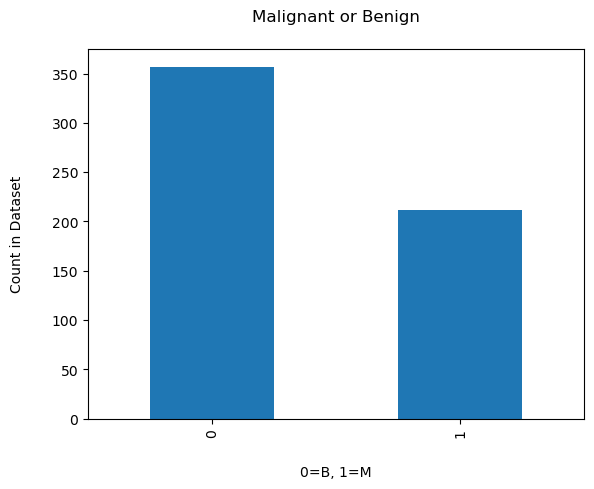

In [12]:
import matplotlib.pyplot as plt

df["diagnosis(1=m, 0=b)"].value_counts().plot(kind='bar')

plt.xlabel("0=B, 1=M", labelpad=20)
plt.ylabel("Count in Dataset", labelpad=20)
plt.title("Malignant or Benign", pad=20)

In [13]:
from sklearn.preprocessing import MinMaxScaler
#scale dataframe down

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [18]:
pip install tensorflow -q

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split

#Build and train the model

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

def build_model(units, units2, random_seed):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=random_seed)
    model = Sequential()
    model.add(Dense(units, input_dim=30, activation='sigmoid', name='layer1'))
    if units2 > 0:
        model.add(Dense(units2, activation='sigmoid', name='layer2'))
    model.add(Dense(1, name='layer3')) 
    model.add(Activation('sigmoid'))  
    model.compile(loss='binary_crossentropy',
              optimizer='adam',             
             metrics=['accuracy'])

    
    return model, X_train, X_test, y_train, y_test

2023-07-30 18:58:48.711071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-30 18:58:52.235408: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-30 18:58:52.259120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 18:58:58.654081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
import seaborn as sns

def print_model(model,X_train, X_test, y_train, y_test, units, units2, random_seed):
    #model.summary()

    history = model.fit(X_train, y_train, 
            validation_data=(X_test, y_test), 
            batch_size=32, 
            epochs=500, 
            verbose=0)

    #plot the training and validation accuracy and loss at each epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    #define subplots
    fig, ax = plt.subplots(1, 3, figsize=(12,5))
    fig.tight_layout()

    plt.subplot(1, 3, 1) # row 1, col 2 index 1
    plt.plot(epochs, loss, 'r--', label='Training loss')
    plt.plot(epochs, val_loss, 'b-', label='Validation loss')
    plt.title(f'Training and Validation Loss \n Random State = {random_seed}\n Layer1 = {units}, Layer2 = {units2}',pad=20)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 3, 2) # index 2
    plt.plot(epochs, acc, 'r--', label='Training Accuacy')
    plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy \n Random State = {random_seed}\n Layer1 = {units}, Layer2 = {units2}',pad=20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 3) # index 3

    plt.title('Confusion Matrix',pad=20)
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy = ", (accuracy * 100.0), "%")

5/5 [==============================] - 0s 8ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


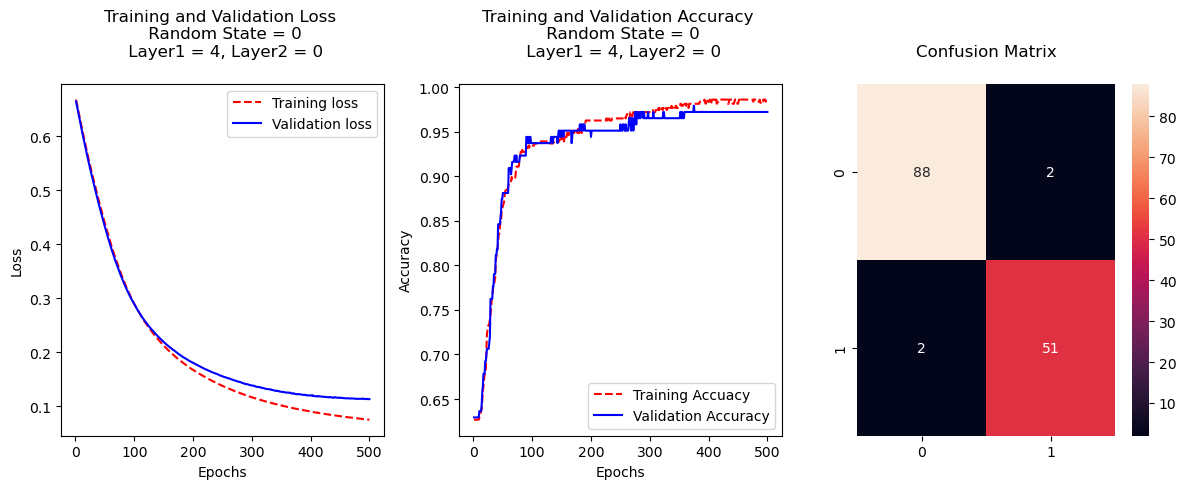

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


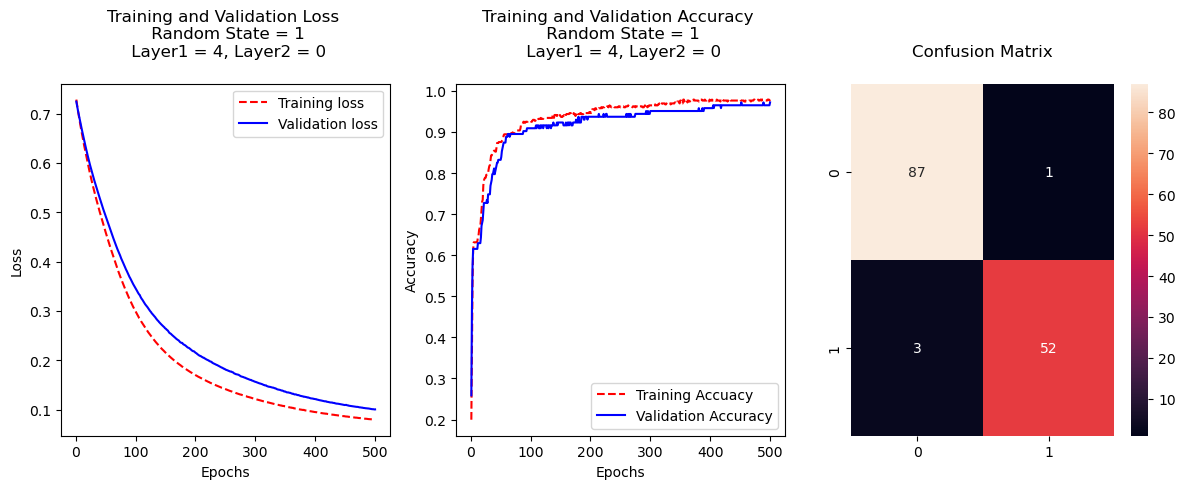

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


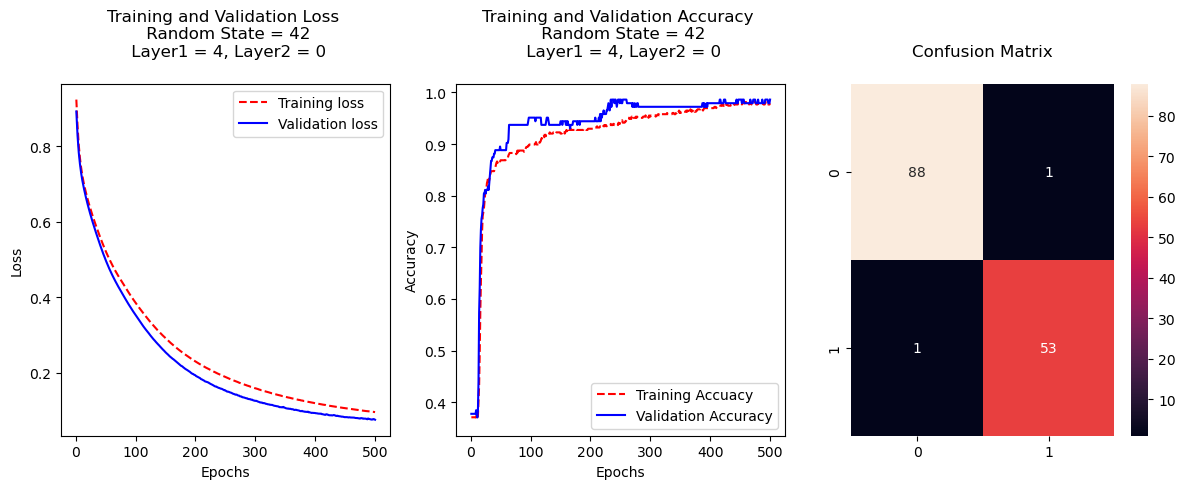

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


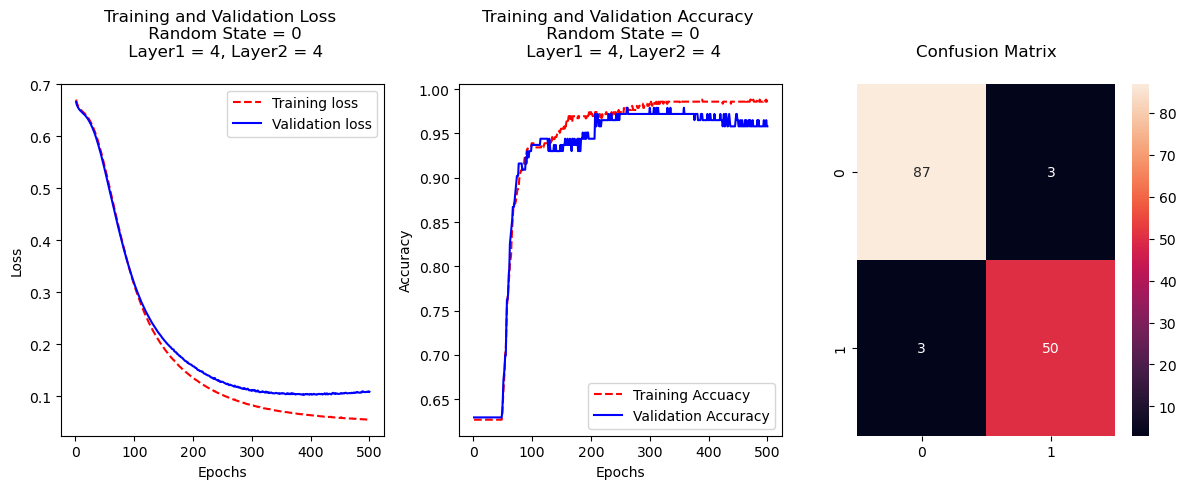

Accuracy =  95.80419659614563 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


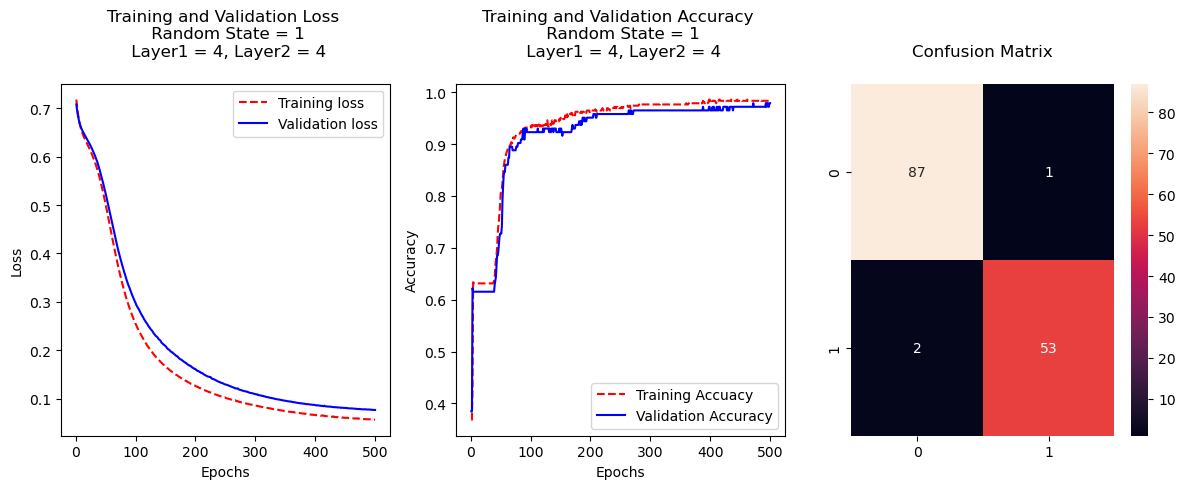

Accuracy =  97.90209531784058 %
5/5 [==============================] - 0s 2ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


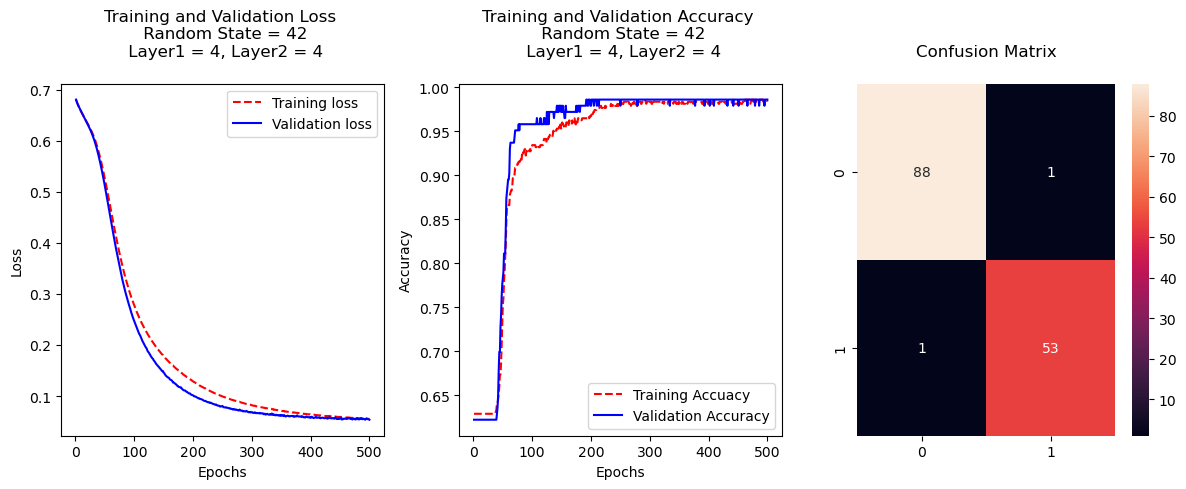

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 2ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


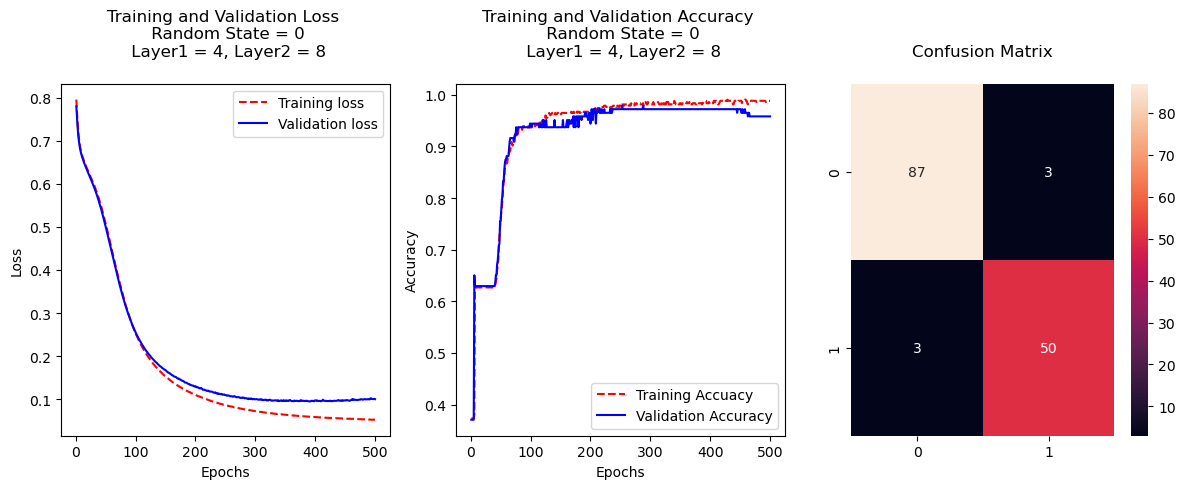

Accuracy =  95.80419659614563 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


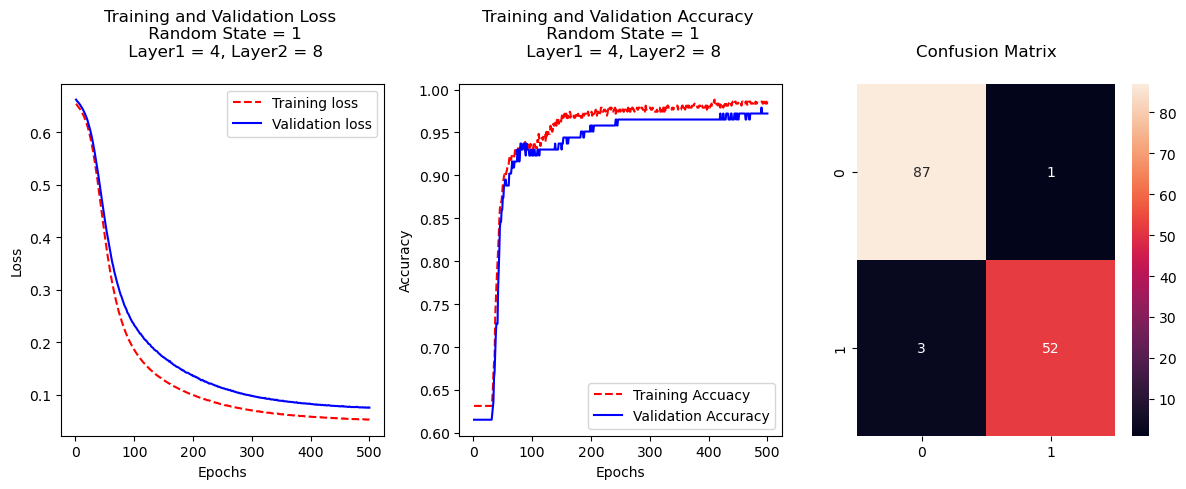

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


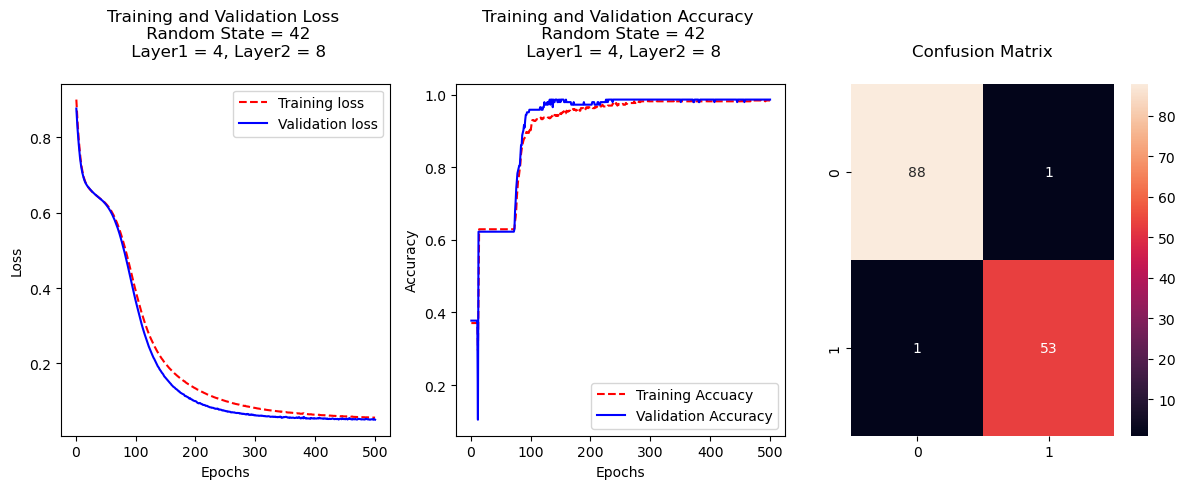

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


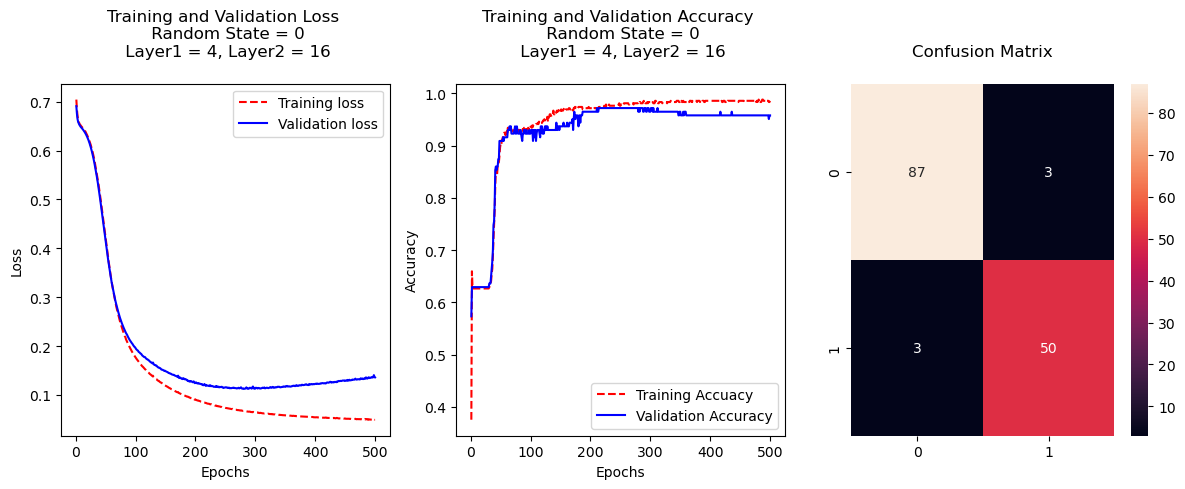

Accuracy =  95.80419659614563 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


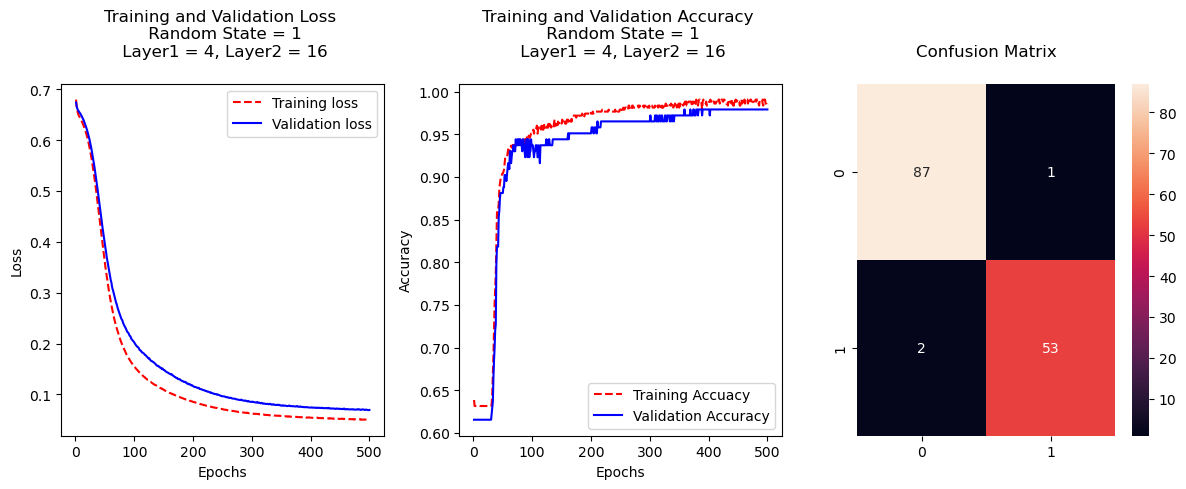

Accuracy =  97.90209531784058 %
5/5 [==============================] - 0s 2ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


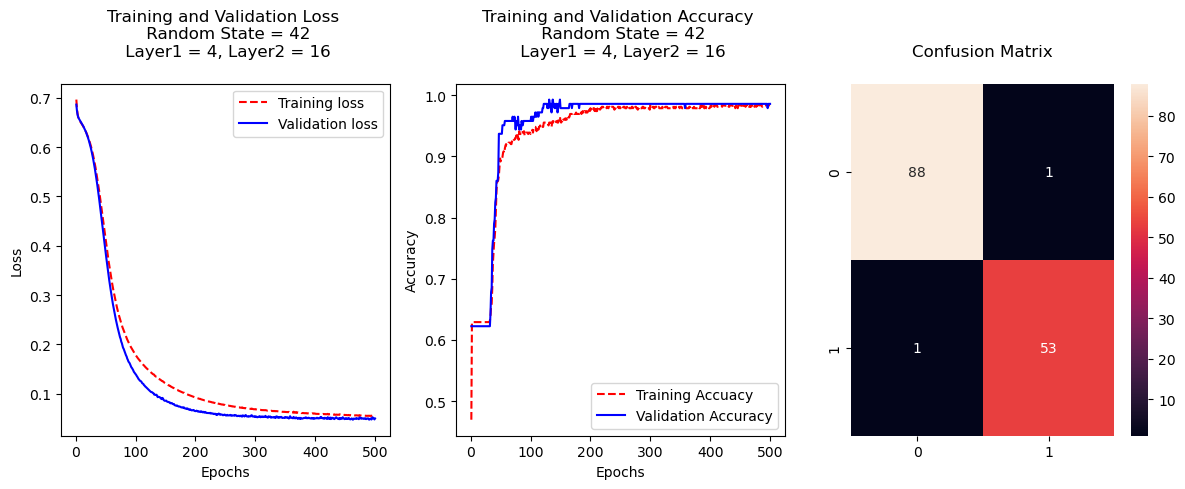

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 2ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


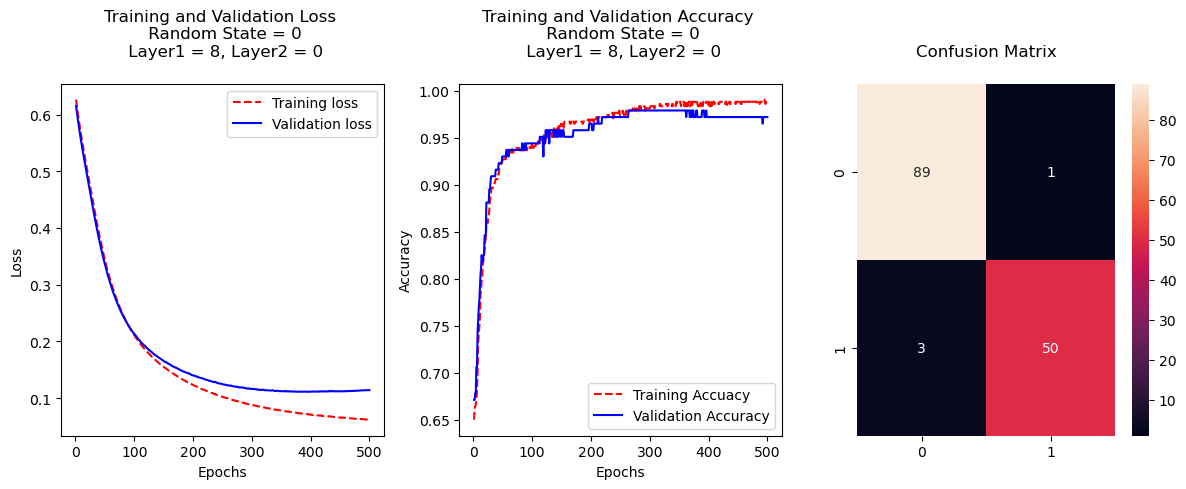

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


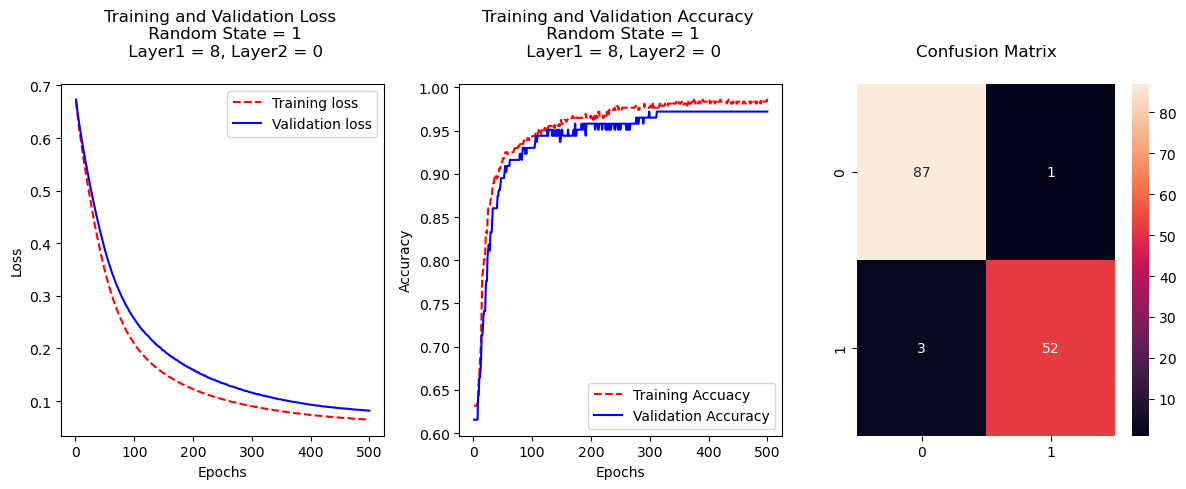

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


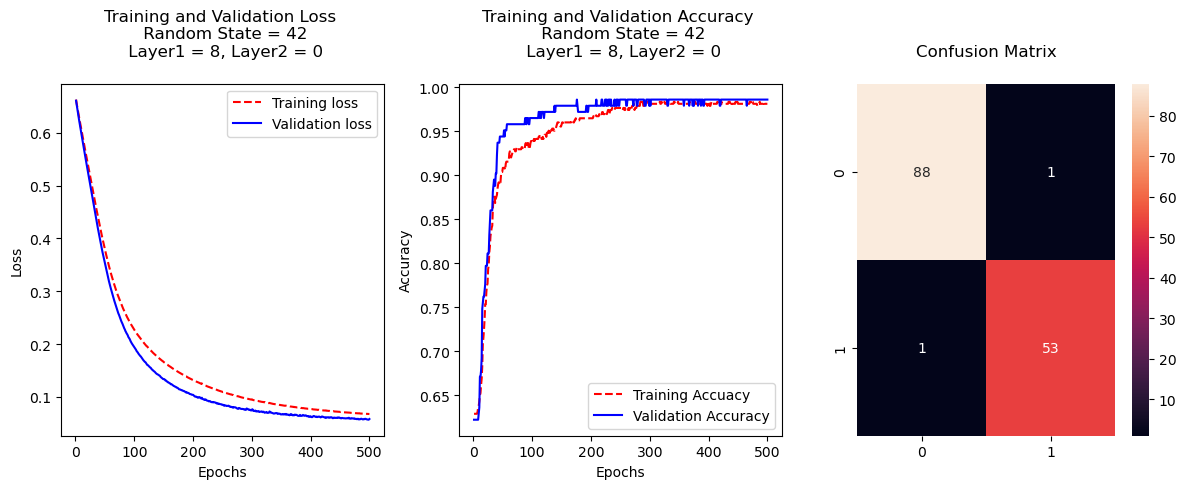

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


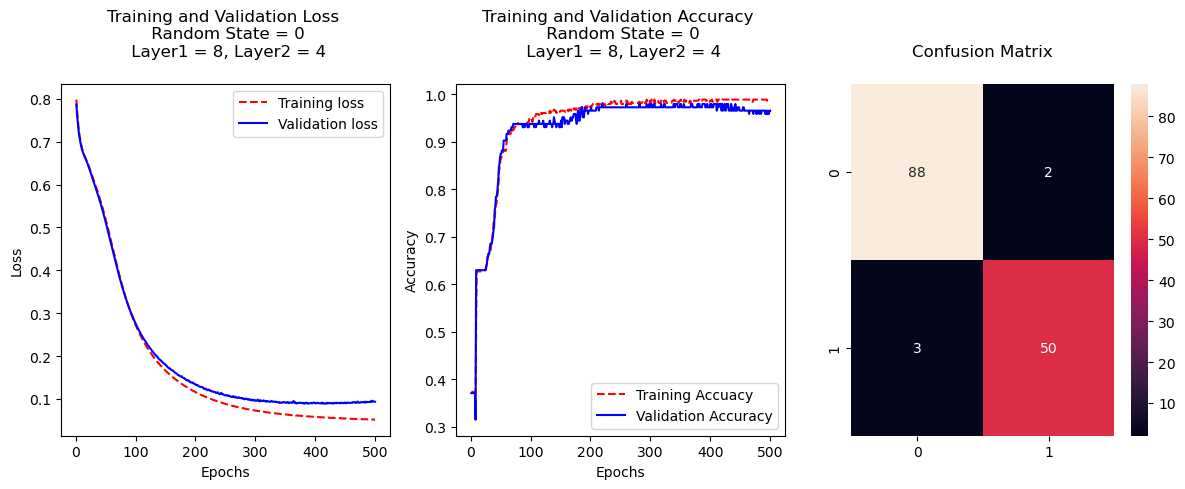

Accuracy =  96.50349617004395 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


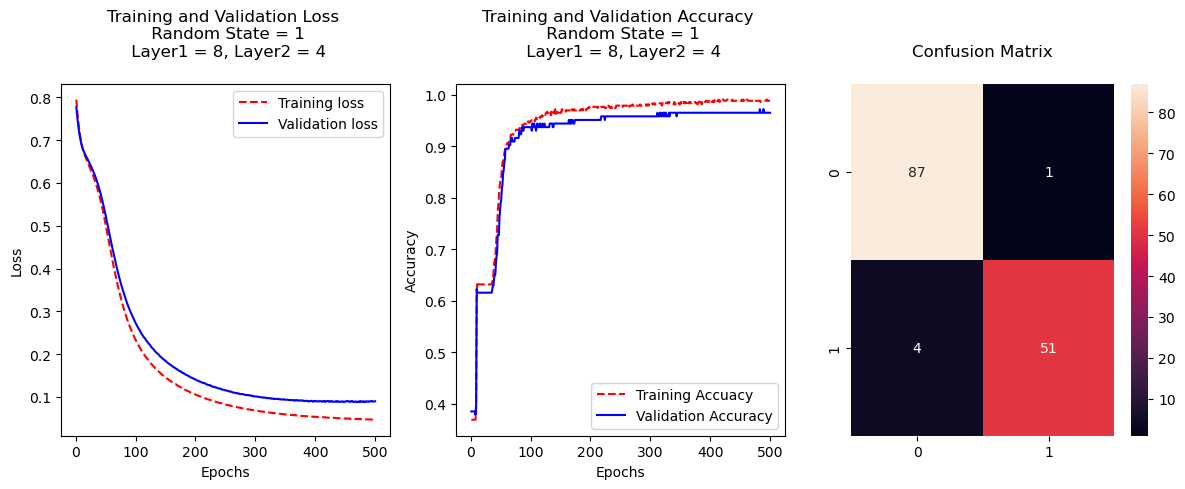

Accuracy =  96.50349617004395 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


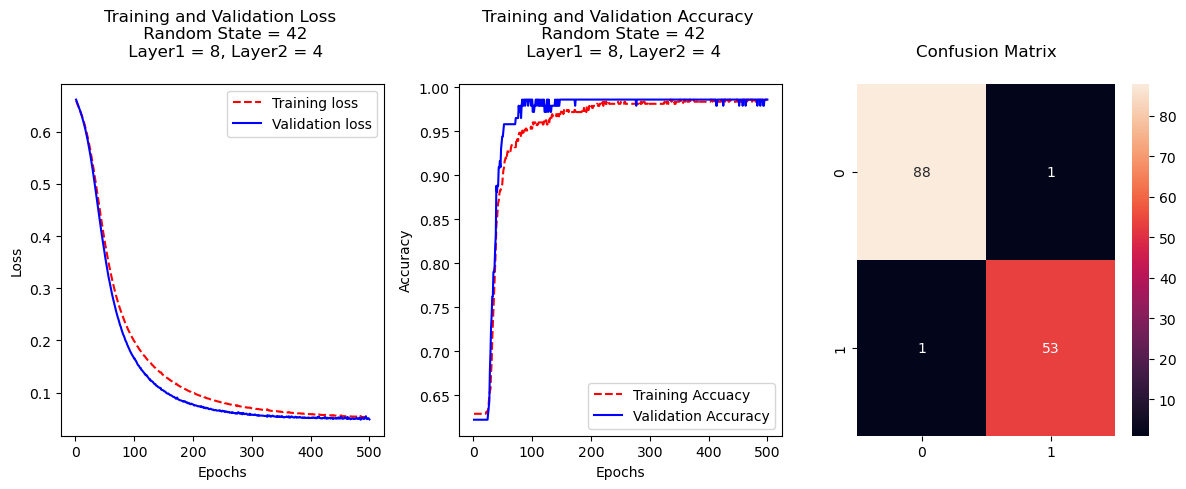

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 2ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


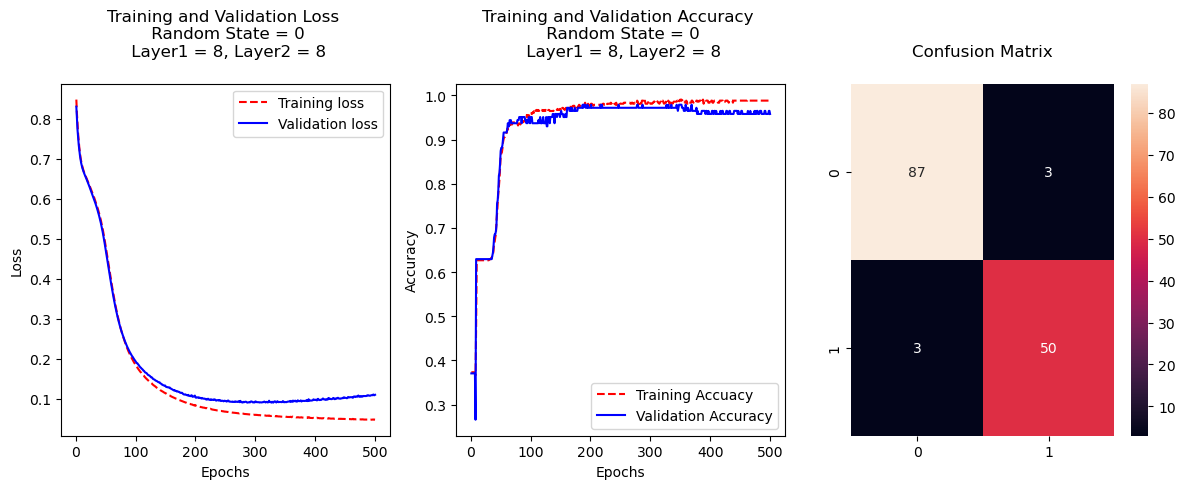

Accuracy =  95.80419659614563 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


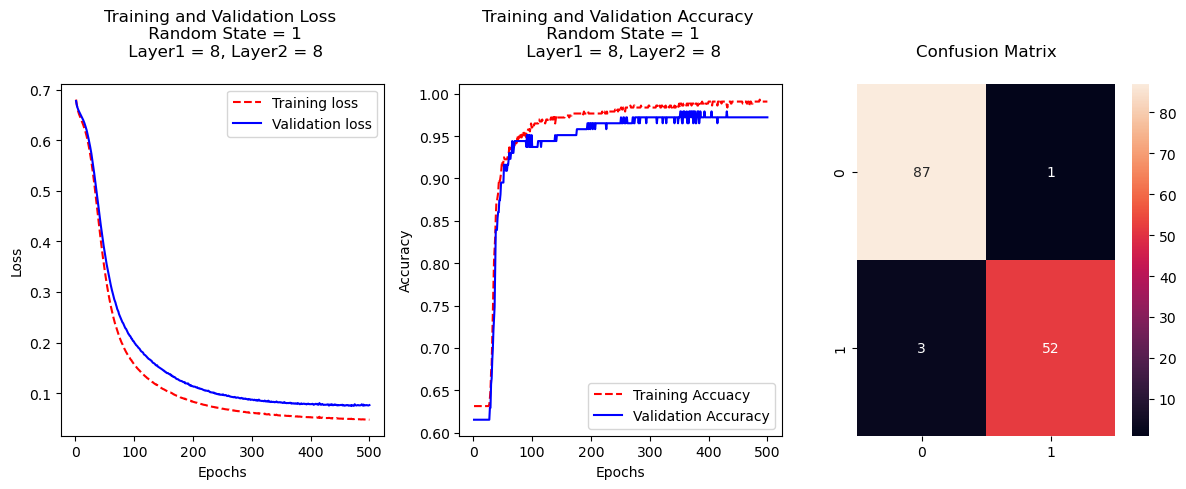

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


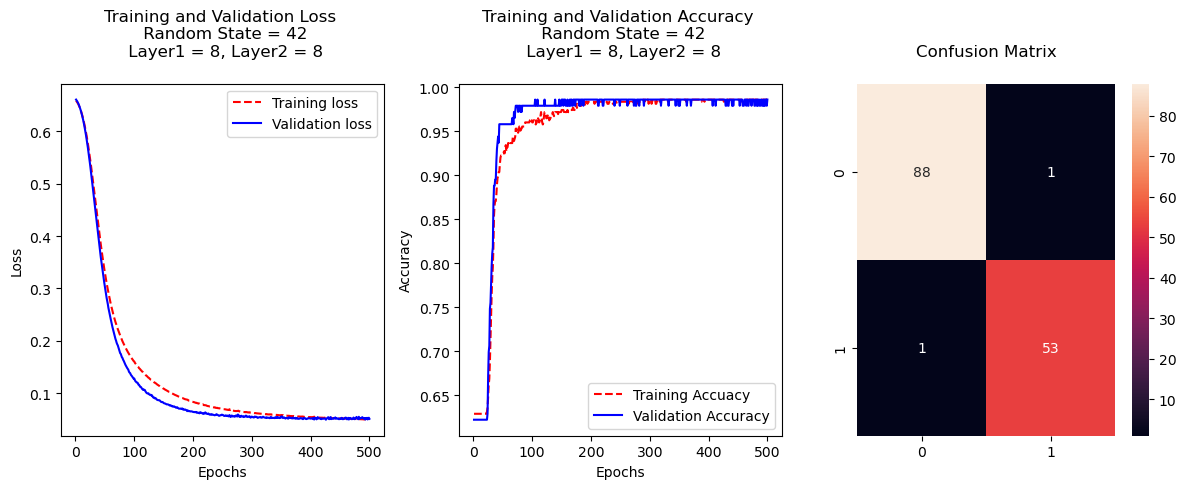

Accuracy =  98.60140085220337 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


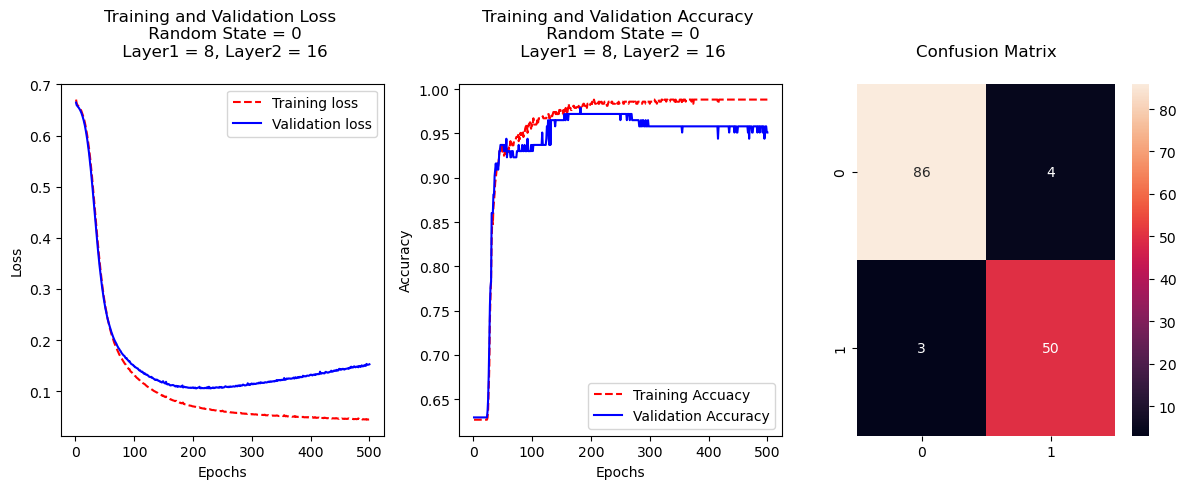

Accuracy =  95.10489702224731 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


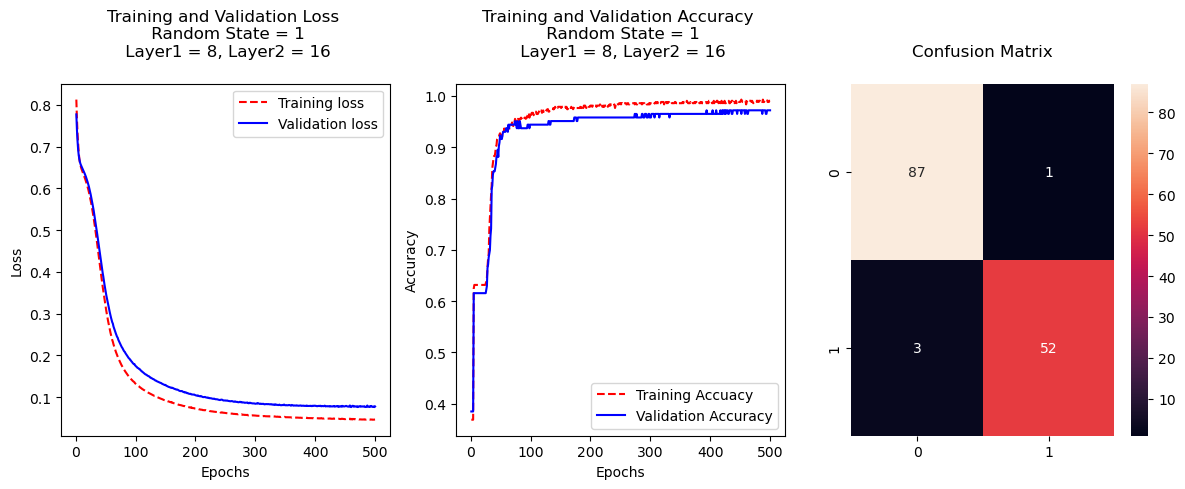

Accuracy =  97.20279574394226 %
5/5 [==============================] - 0s 1ms/step


/tmp/ipykernel_3016/2086822998.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


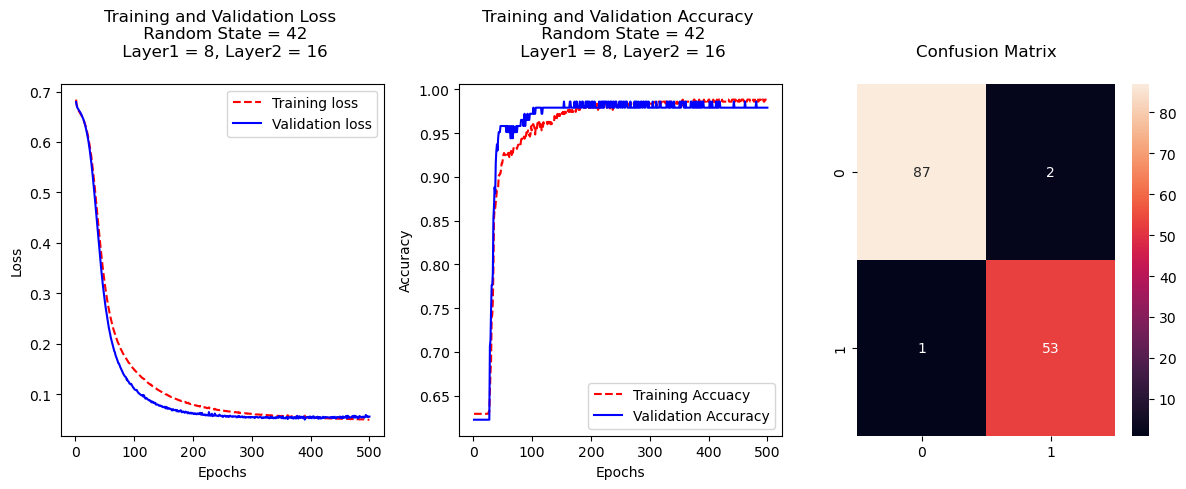

Accuracy =  97.90209531784058 %


In [17]:
units, units2, random_seed = [4,8], [0,4,8,16], [0,1,42] #model performed better with 1 layer
                                                         # so setting units2 to 0

for i in units:
    for j in units2:
        for k in random_seed:
            model, X_train, X_test, y_train, y_test = build_model(i, j, k)
            print_model(model,X_train, X_test, y_train, y_test, i, j, k)

From these charts, we can see layer 1 having 4 or 8 units, no second layer will be best fit for the data